<a href="https://colab.research.google.com/github/AlexeyKatko/ColabKatko/blob/main/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 9. Линейная регрессия Логистическая регрессия

## Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

### Решение 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Решение без intercept

In [3]:
r = np.corrcoef(zp, ks)
r[0][1]

0.8874900920739162

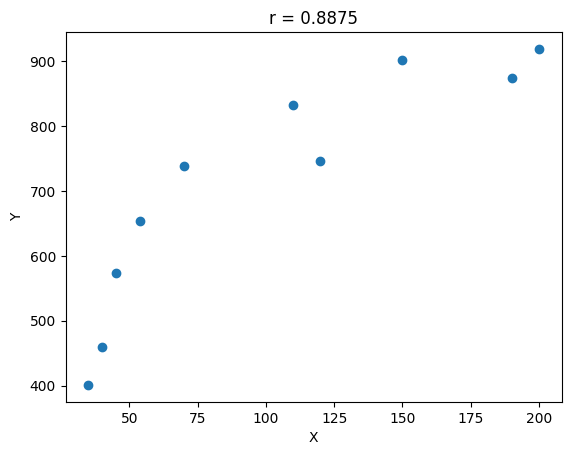

In [4]:
plt.scatter(zp, ks)
plt.title(f'r = {round(r[0][1], 4)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика видно, что можно предположить о наличии линейной взаимосви:
Линейная зависимость: $ \bar y=b_1+b_0\cdot \bar x$

Парная регрессия: $b_0=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$ и $b_1=\bar y-b_0\cdot\bar x$

In [5]:
b0 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b1 = np.mean(ks) - b0 * np.mean(zp)

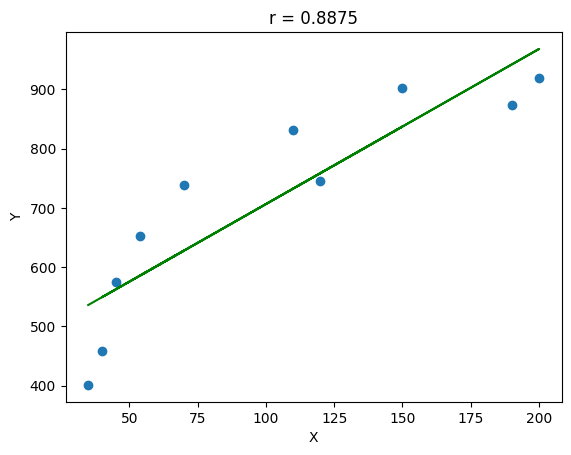

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, b1 + b0 * zp, c='g')
plt.title(f'r = {round(r[0][1], 4)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Ответ:

График наглядно показывает линейную взаимосвязь между величиной заработной платы и значением кредитного скоринга.

### Решение 1.2

С помощью intercept

In [7]:
model = LinearRegression() # зададим модель линейной регрессии
zp = zp.reshape(-1,1) # делаем массив zp двумерным атрибутом
regres = model.fit(zp, ks) # подбираем коэффициенты
const = regres.intercept_
beta = regres.coef_
r_sq = model.score(zp, ks)
print(const) # выводим интерсепрт
print(beta) # выводим коэффициенты
print(r_sq)

444.1773573243595
[2.62053888]
0.7876386635293685


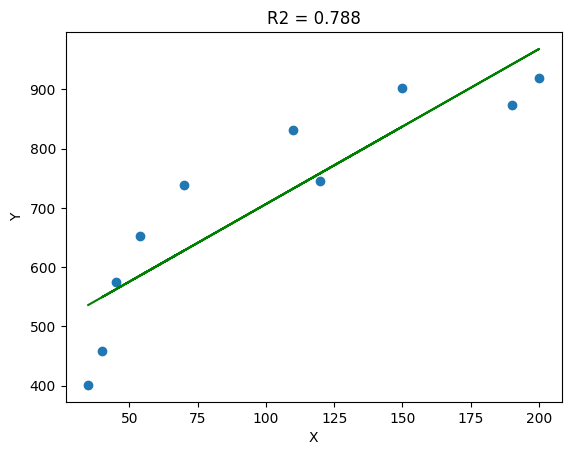

In [8]:
plt.scatter(zp, ks)
plt.plot(zp, const + beta * zp, c='g')
plt.title(f'R2 = {round(r_sq, 3)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

### Решение 2.1

Линейная зависимость: $ \bar y=b_1+b_0\cdot \bar x$

Парная регрессия: $b_0=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$ и $b_1=\bar y-b_0\cdot\bar x$

Функция потерь: $mse=\frac{1}{n}\sum^n_{i=1}(b_0*\bar x-{\bar y})^2$

Производная функция потерь: $mse'=\frac{2}{n}\sum^n_{i=1}((b_1*\bar x-{\bar y})*\bar x)$

In [9]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b0 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)

In [10]:
def mse(b0, x, y):
    return np.sum((b0 * x - y) ** 2) / len(x)

def mse_(b1, x, y):
    return (2 / len(x)) * np.sum((b1 * x - y) * x)

In [11]:
alpha = 1e-6
b1 = 0.1
iteration = 3000
for i in range(iteration):
    b1 -= alpha * mse_(b1, zp, ks)
    if i % 300 == 0:
        print(f'Итерация = {i}, b1 = {b1}, mse = {mse(b1, zp, ks)}'.format(i = i, b1 = b1, mse = mse_(b1, zp, ks)))

Итерация = 0, b1 = 0.25952808000000005, mse = 493237.7212546963
Итерация = 300, b1 = 5.888531320728348, mse = 56516.88130936019
Итерация = 600, b1 = 5.889820124983314, mse = 56516.85841572062
Итерация = 900, b1 = 5.889820420065112, mse = 56516.85841571941
Итерация = 1200, b1 = 5.889820420132673, mse = 56516.85841571943
Итерация = 1500, b1 = 5.889820420132673, mse = 56516.85841571943
Итерация = 1800, b1 = 5.889820420132673, mse = 56516.85841571943
Итерация = 2100, b1 = 5.889820420132673, mse = 56516.85841571943
Итерация = 2400, b1 = 5.889820420132673, mse = 56516.85841571943
Итерация = 2700, b1 = 5.889820420132673, mse = 56516.85841571943


## Задача 3

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

### Решение 3

In [12]:
# Частная функция потерь
def mse_ab(a, b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)

# Производная функция потерь по a
def mse_pa(a, b, x, y):
    return 2 * np.sum((a + b * x) - y) / len(x)

# Производная функция потерь по b
def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

In [13]:
alpha = 3e-5
b = 0.1
a = 0.1
mseab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
iteration = 1000000
for i in range(iteration):
    a -= alpha * mse_pa(a, b, zp, ks)
    b -= alpha * mse_pb(a, b, zp, ks)
    if i % 10000 == 0:
        print(f'Итерация = {i}, a = {a}, b = {b}, mse = {mse_ab(a, b, zp, ks)}'.format(i = i, a = a, b = b))

Итерация = 0, a = 0.14197959999999998, b = 4.884978596113599, mse = 70366.2821016992
Итерация = 10000, a = 62.83828803932022, b = 5.427320315175873, mse = 43358.234980083085
Итерация = 20000, a = 116.67663832001111, b = 5.031052284674057, mse = 33677.68067521507
Итерация = 30000, a = 162.9139631763182, b = 4.690730310450177, mse = 26537.616149105896
Итерация = 40000, a = 202.6233933264173, b = 4.398455796170108, mse = 21271.33491856043
Итерация = 50000, a = 236.72655235964433, b = 4.147445287981601, mse = 17387.09579189967
Итерация = 60000, a = 266.0149468707068, b = 3.9318730360654524, mse = 14522.206331463507
Итерация = 70000, a = 291.1683366842369, b = 3.7467357837186466, mse = 12409.156296983896
Итерация = 80000, a = 312.77051152767103, b = 3.587736645833962, mse = 10850.638766071937
Итерация = 90000, a = 331.3228403161871, b = 3.4511853816901183, mse = 9701.126518597765
Итерация = 100000, a = 347.2559075176058, b = 3.3339127474648516, mse = 8853.283372220058
Итерация = 110000, a =

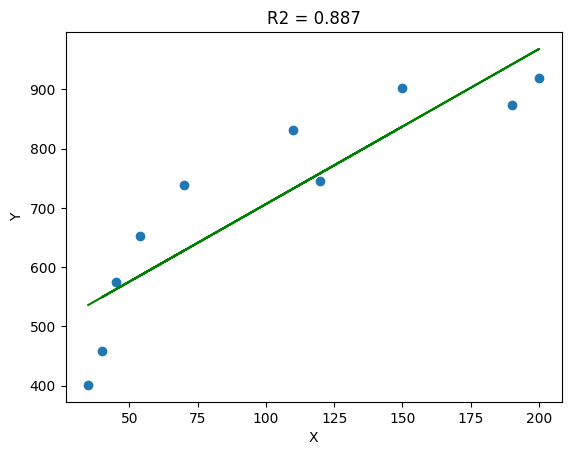

In [14]:
const = 444.1772
beta = 2.6205
r = np.corrcoef(zp, ks)
plt.scatter(zp, ks)
plt.plot(zp, const + beta * zp, c='g')
plt.title(f'R2 = {round(r[0][1], 3)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
